<a href="https://colab.research.google.com/github/mounika1983/IK-Assignments/blob/main/notebookb2e9ecf5c3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'videoinput:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F5050552%2F8470260%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240520%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240520T235107Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D8dcba80d8072374eeb6b84bfb9ecdf524c92340f7caf589565479c21df6db8087aaf8d644a82dbef284d02165e53d935c6a903ef524a62fa13562c0a1bfb9fc5f739efeb65b6266c4ad29afd7da1c8d996641b2544804284f5e24f6b562a4e245a43782cce065c892ab6f3bd817b1420a147266fd773030fef35225cfd486c451b7375423252ad103ed73c8a7a8966d8ee7cc201039cb2a359ef5c07977e8a635f5bda23e6516ac8542154805d884016cfeb2ffb6abd88107a624b9785808fbb14d59c00c2c353ec815a0c399cd5ec2970f3a4bc3d54f6d03a213c2e1d9c16f8c2bc33cd6976756ec2a0ba7b89de0dd70d14b8fcc0e5dabdb9404a6e94f5890b'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')



# **Mounika Kakanuru**
mounikapg@gmail.com

## **Understanding Group Emotions through Individual Facial Analysis**

Facial emotion detection has become an important tool in various fields like psychology, marketing, and law enforcement. It involves using computer algorithms to analyze facial expressions in images or videos and detect emotional states such as happiness, sadness, anger, and surprise. In this blog post, we will take you through the process of building a facial emotion detection model using YOLOv8.


<div align="center">

  <a href="https://ultralytics.com/yolov8" target="_blank">
    <img width="1024", src="https://raw.githubusercontent.com/ultralytics/assets/main/yolov8/banner-yolov8.png"></a>


<br>
  <a href="https://console.paperspace.com/github/ultralytics/ultralytics"><img src="https://assets.paperspace.io/img/gradient-badge.svg" alt="Run on Gradient"/></a>
  <a href="https://colab.research.google.com/github/ultralytics/ultralytics/blob/main/examples/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
  <a href="https://www.kaggle.com/ultralytics/yolov8"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a>
<br>

Welcome to the Ultralytics YOLOv8 🚀 notebook! <a href="https://github.com/ultralytics/ultralytics">YOLOv8</a> is the latest version of the YOLO (You Only Look Once) AI models developed by <a href="https://ultralytics.com">Ultralytics</a>. This notebook serves as the starting point for exploring the various resources available to help you get started with YOLOv8 and understand its features and capabilities.

YOLOv8 models are fast, accurate, and easy to use, making them ideal for various object detection and image segmentation tasks. They can be trained on large datasets and run on diverse hardware platforms, from CPUs to GPUs.

We hope that the resources in this notebook will help you get the most out of YOLOv8. Please browse the YOLOv8 <a href="https://docs.ultralytics.com/">Docs</a> for details, raise an issue on <a href="https://github.com/ultralytics/ultralytics">GitHub</a> for support, and join our <a href="https://ultralytics.com/discord">Discord</a> community for questions and discussions!

</div>

## **1. Import Images**

The first step in building a facial emotion detection model is to gather a dataset of facial images. Once you have downloaded your images, the next step is to label them using a tool such as Roboflow. This involves manually identifying and annotating the facial features in each image, such as the eyes, nose, mouth, and eyebrows. You will also need to label each face with the appropriate emotional state (e.g., happy, sad, angry, etc.).

Roboflow makes this process much easier by providing a user-friendly interface and a variety of labeling tools. You can follow their in-depth tutorial to get started. After labeling, you can download your data as a zip file. But, I copied datasets in the inputs to skip downloading step

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from IPython import display
display.clear_output()

HOME = os.getcwd()
print(HOME)
#You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/working


## 2. **Add the required pyhton library imports**

In [ ]:
!pip install ultralytics==8.0.196
!pip install deepface
!pip install Pillow

from IPython import display
display.clear_output()

In [ ]:
import ultralytics
ultralytics.checks()

from ultralytics import YOLO
from IPython.display import display, Image
from deepface import DeepFace

import glob
import cv2
import pprint
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5597.6/8062.4 GB disk)


##  **3: Training on YOLOv8**

After labeling the images, it’s time to train your facial emotion detection model using YOLOv8. YOLOv8 is a popular object detection algorithm that uses a deep neural network to identify objects in images and videos. To train your model, you will need to use a machine learning platform. You will need to download the YOLOv8 code and modify it to work with your labeled dataset.



In [ ]:
model = YOLO(f'{HOME}/yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 22.8MB/s]


**Training starts this will take time depending your system. training metrix and result append on result destination.**

In [ ]:
model.train(data='/kaggle/input/facedetection2/data.yaml', seed=42, epochs=25, imgsz=800, conf=0.25, iou=0.5, device=0, plots=True, save=True)

New https://pypi.org/project/ultralytics/8.2.18 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=/kaggle/working/yolov8n.pt, data=/kaggle/input/facedetection2/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=0.25, iou=0.5, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, vis

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e245b2bbd00>
fitness: 0.58972933917464
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.54942,     0.62476,     0.69828,     0.51869,     0.57249,     0.47132])
names: {0: 'anger', 1: 'fear', 2: 'happy', 3: 'neutral', 4: 'normal', 5: 'sad'}
plot: True
results_dict: {'metrics/precision(B)': 0.7135792555741272, 'metrics/recall(B)': 0.7705052777877806, 'metrics/mAP50(B)': 0.744849739435522, 'metrics/mAP50-95(B)': 0.572493739145653, 'fitness': 0.58972933917464}
save_dir: PosixPath('runs/detect/train3')
speed: {'preprocess': 0.24170756340026855, 'inference': 3.123927116394043, 'loss': 0.0011599063873291016, 'postprocess': 4.7703492641448975}

In [ ]:
!ls {HOME}/runs/detect/train/

F1_curve.png					  train_batch1.jpg
PR_curve.png					  train_batch1830.jpg
P_curve.png					  train_batch1831.jpg
R_curve.png					  train_batch1832.jpg
args.yaml					  train_batch2.jpg
confusion_matrix.png				  val_batch0_labels.jpg
confusion_matrix_normalized.png			  val_batch0_pred.jpg
events.out.tfevents.1716235834.268eb28be019.35.0  val_batch1_labels.jpg
labels.jpg					  val_batch1_pred.jpg
labels_correlogram.jpg				  val_batch2_labels.jpg
results.csv					  val_batch2_pred.jpg
results.png					  weights
train_batch0.jpg


## **Training results**

### **Confusion Matrix (confusion_matrix.png):**

The confusion matrix provides a detailed view of the outcomes, showcasing the counts of true positives, true negatives, false positives, and false negatives for each class.

/kaggle/working


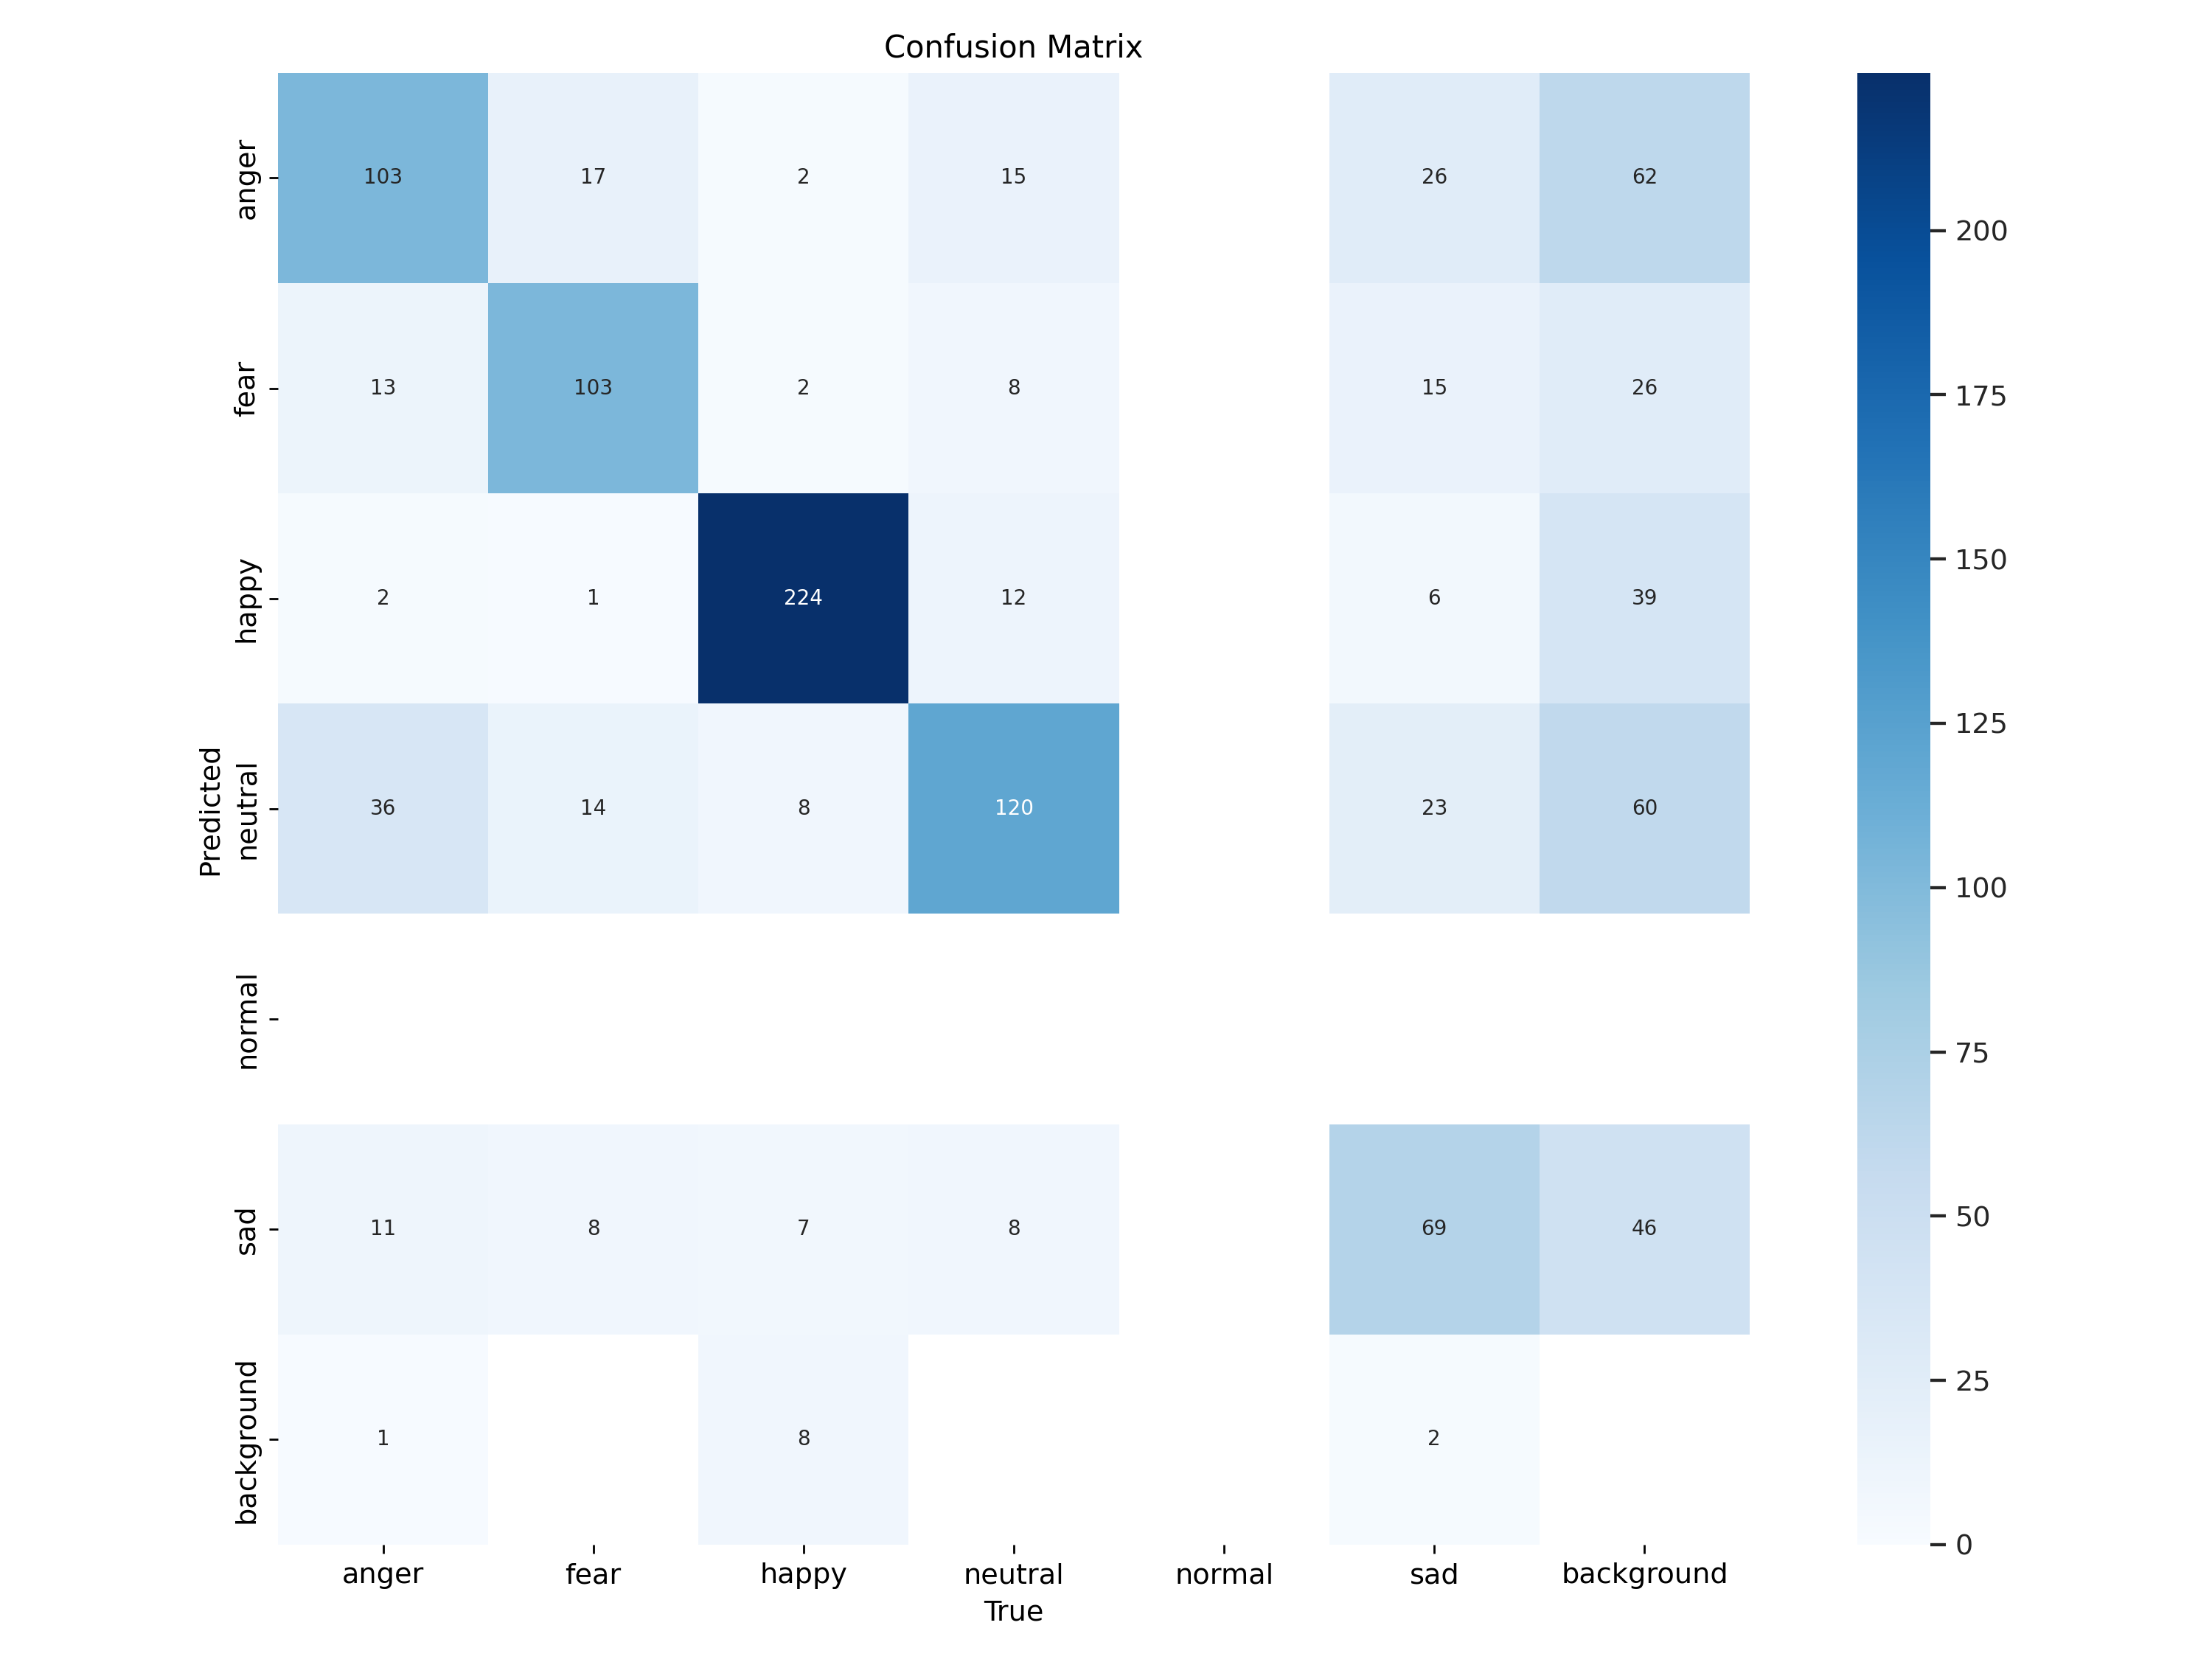

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/kaggle/working


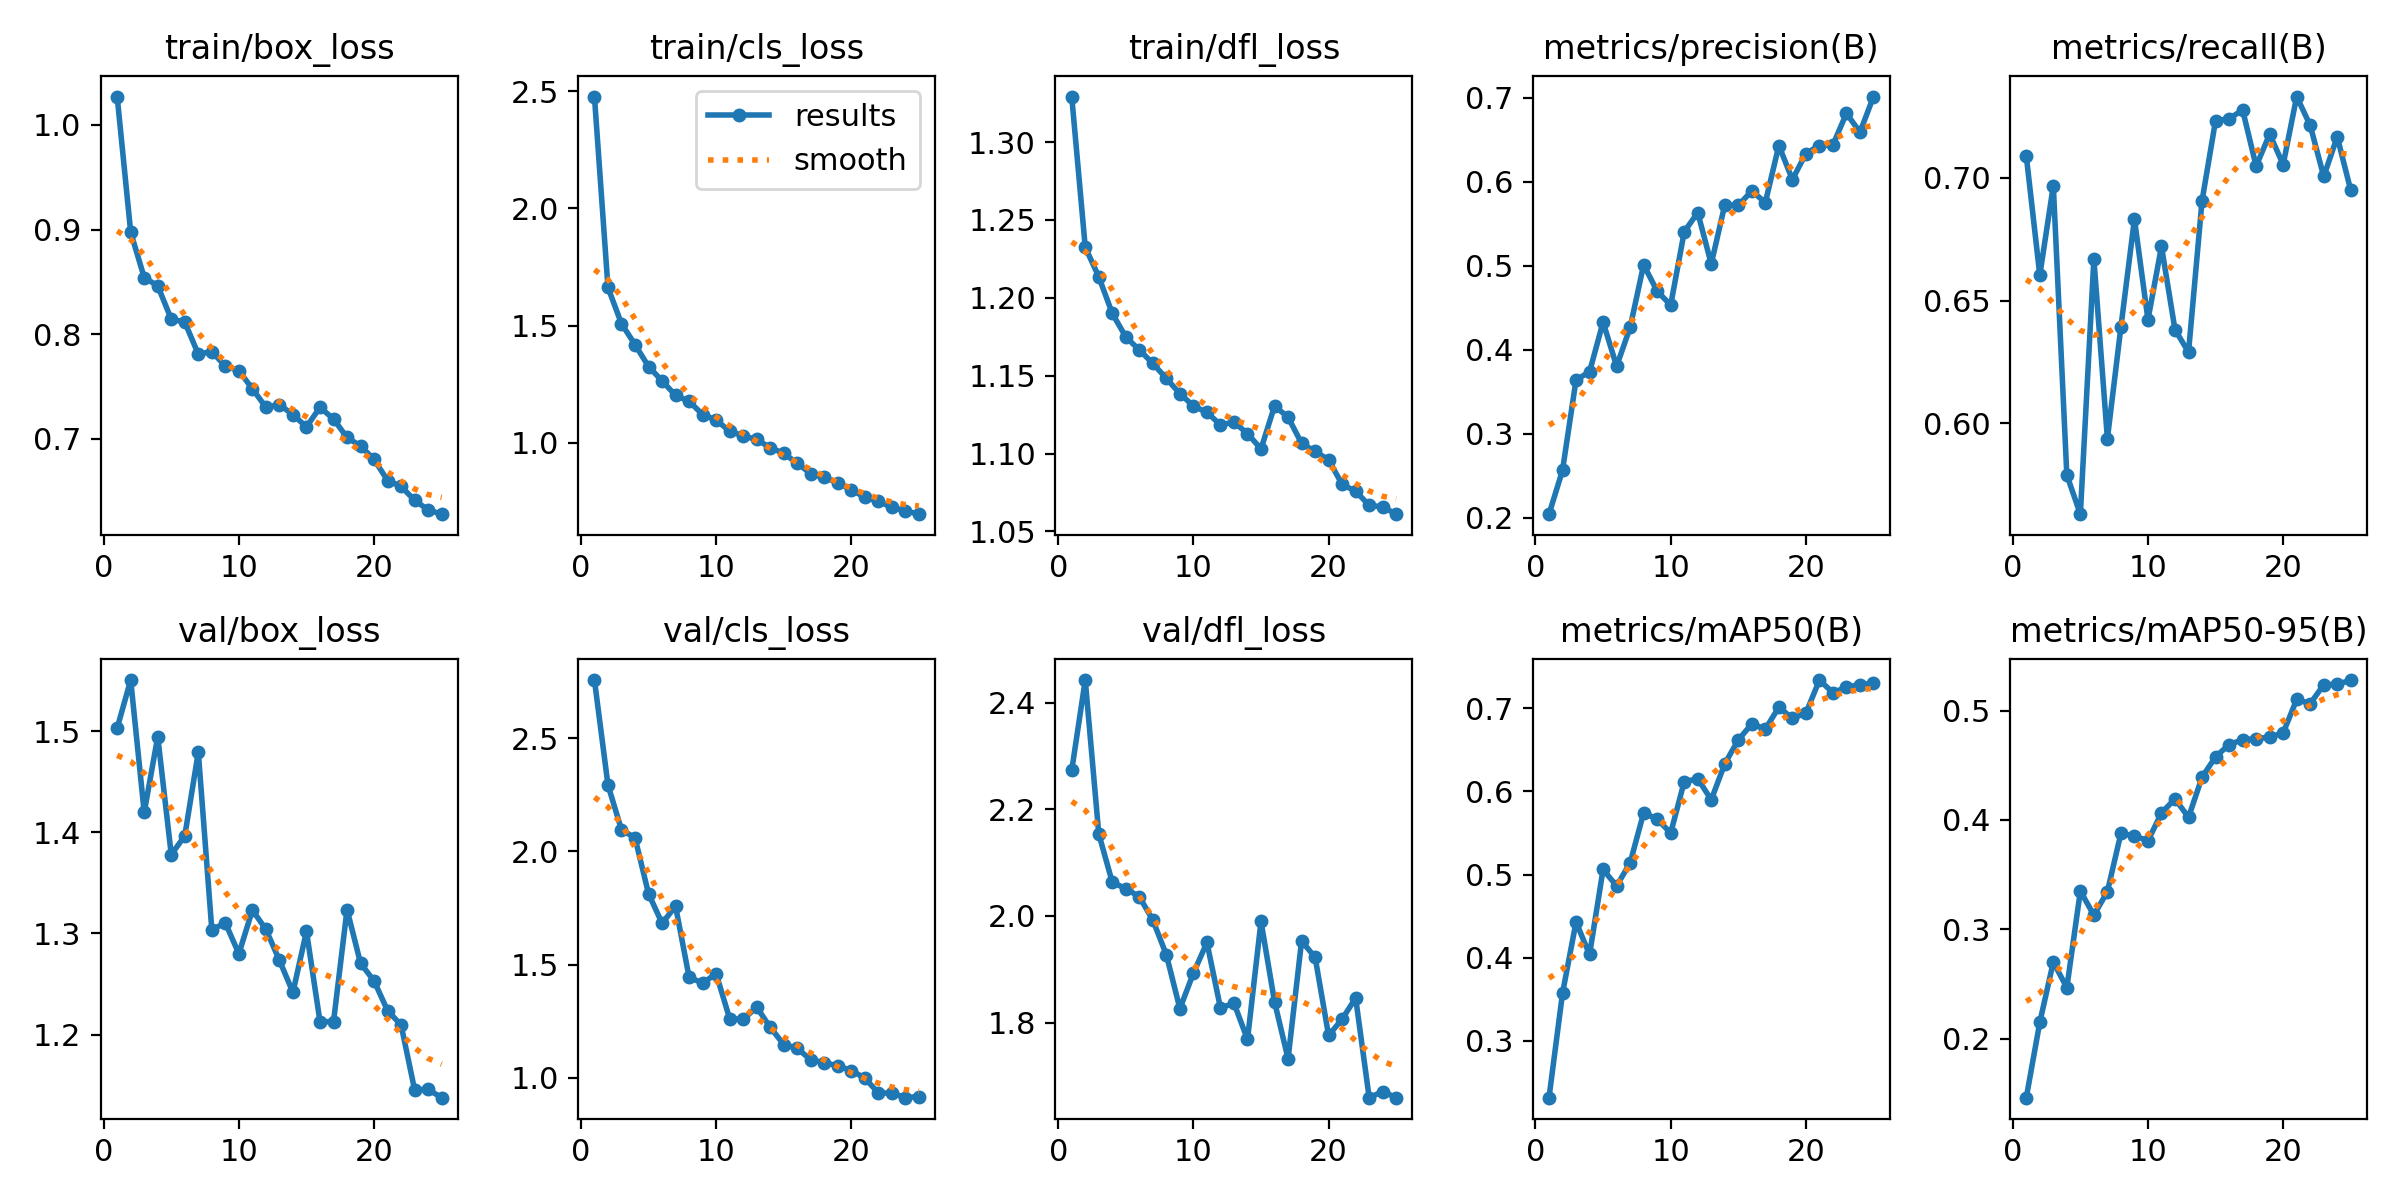

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

### **F1 Score Curve (F1_curve.png):**

This curve represents the F1 score across various thresholds. Interpreting this curve can offer insights into the model's balance between false positives and false negatives over different thresholds.

/kaggle/working


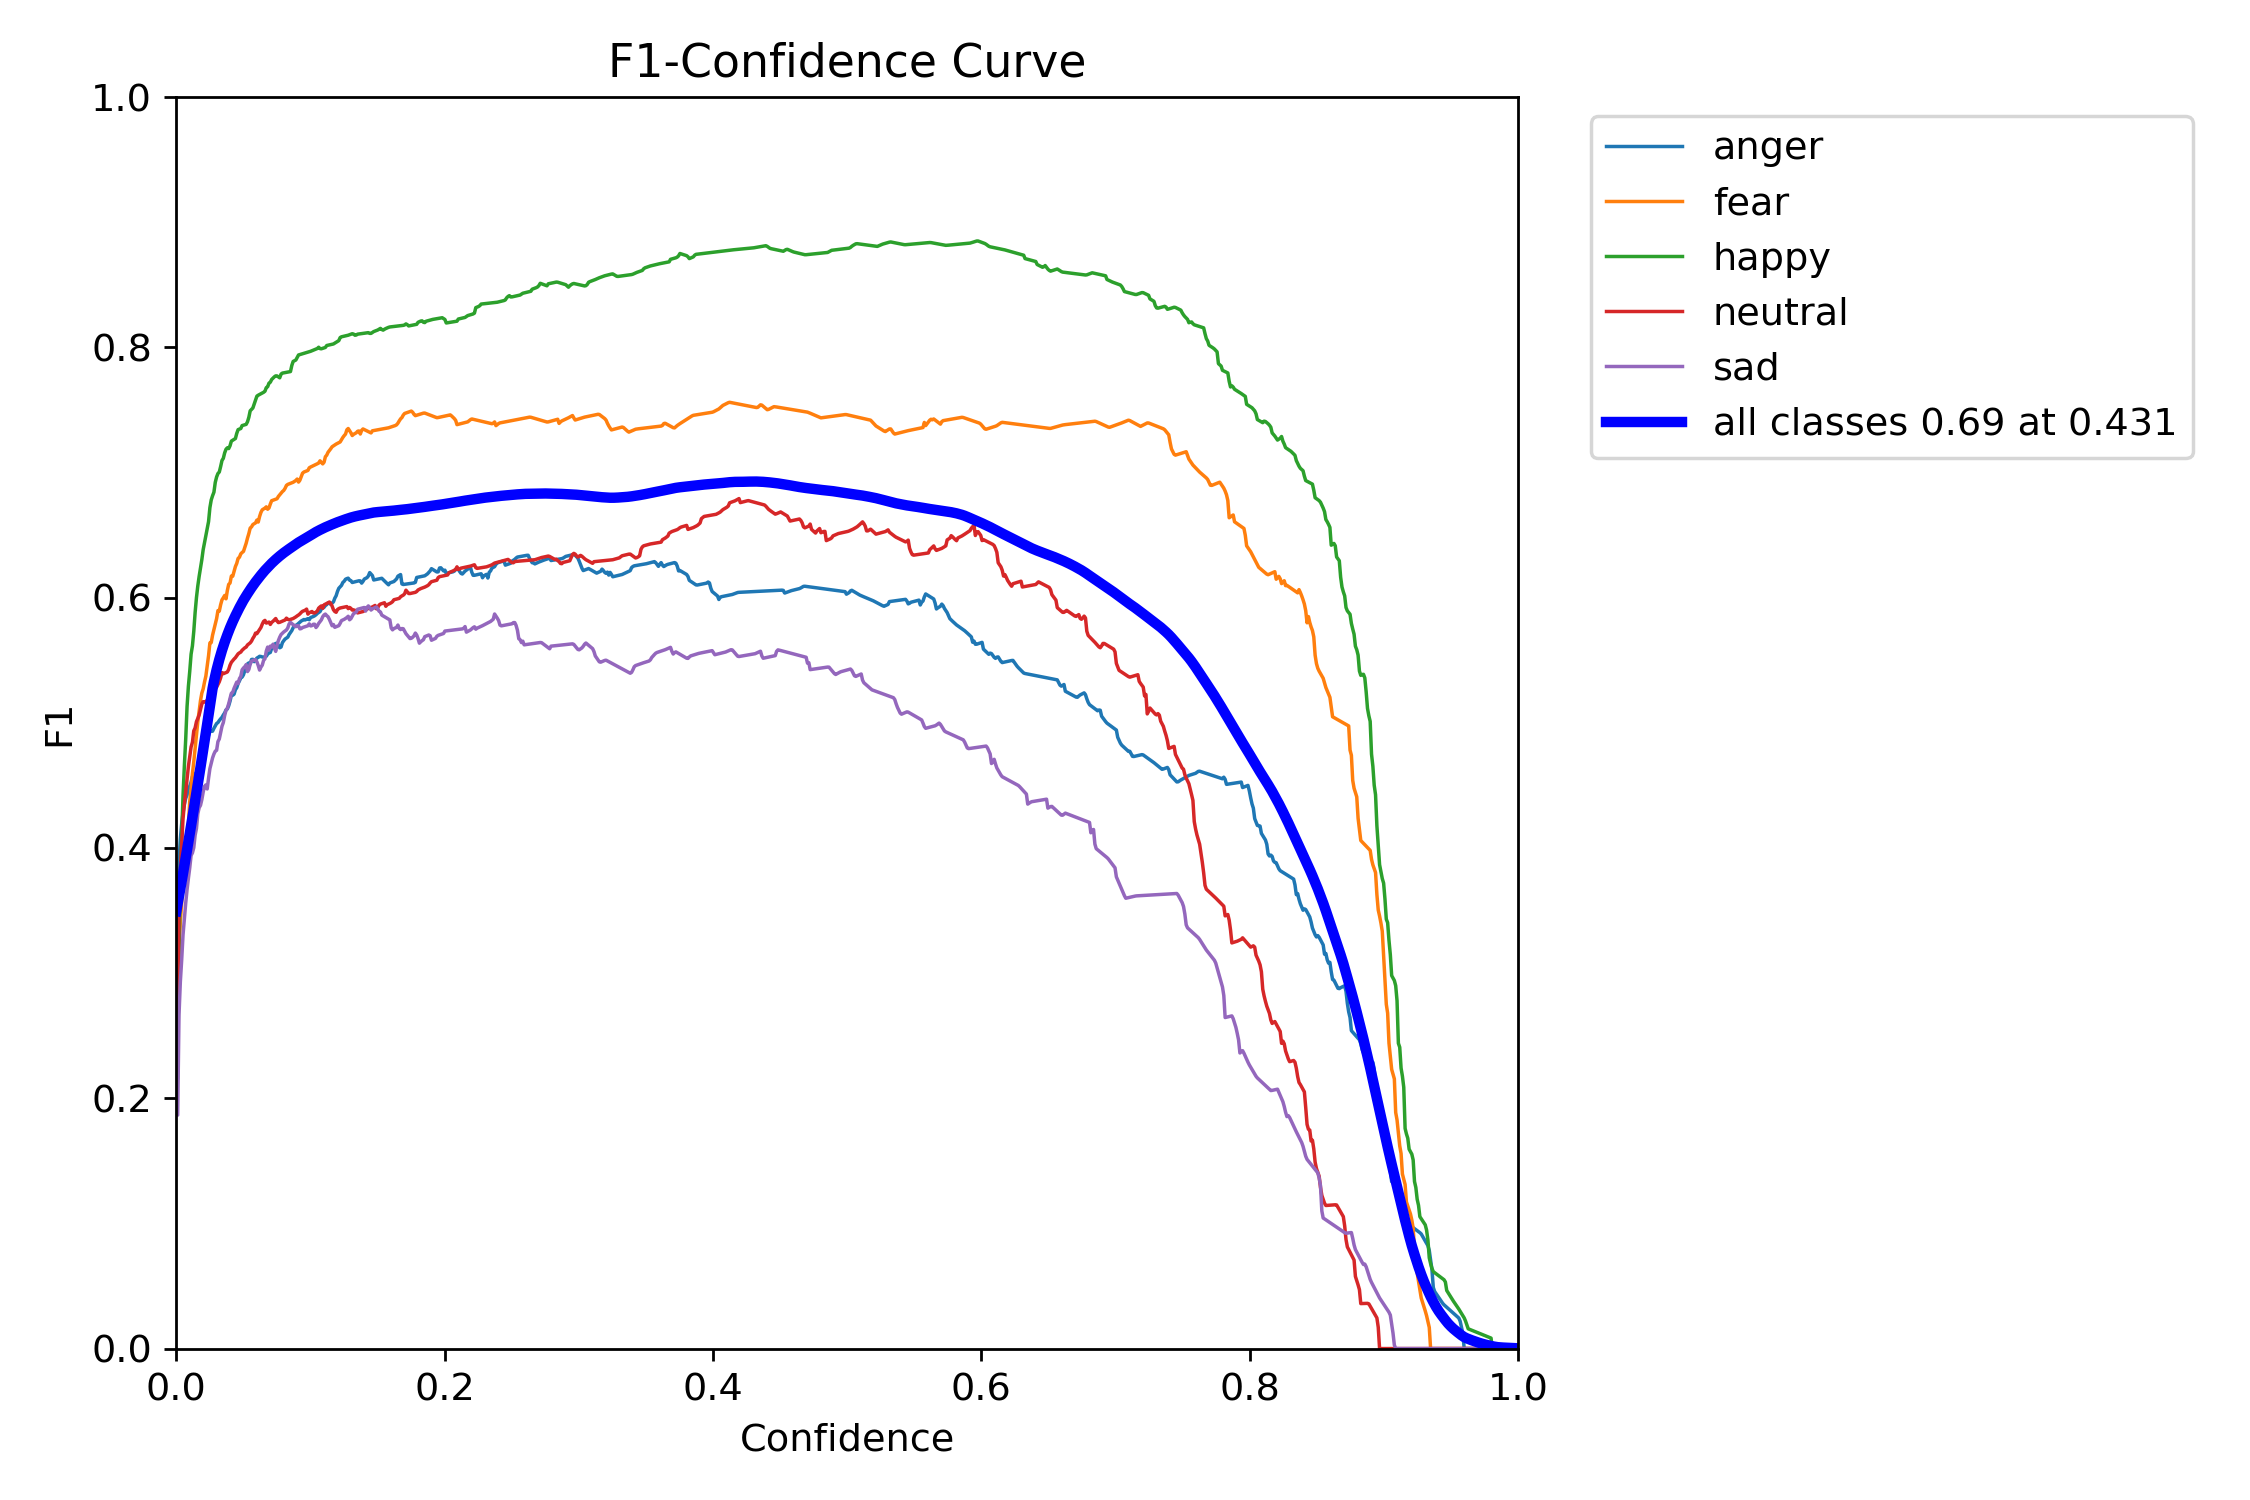

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/F1_curve.png', width=600)

### **Precision Curve (P_curve.png):**

A graphical representation of precision values at different thresholds. This curve helps in understanding how precision varies as the threshold changes.

/kaggle/working


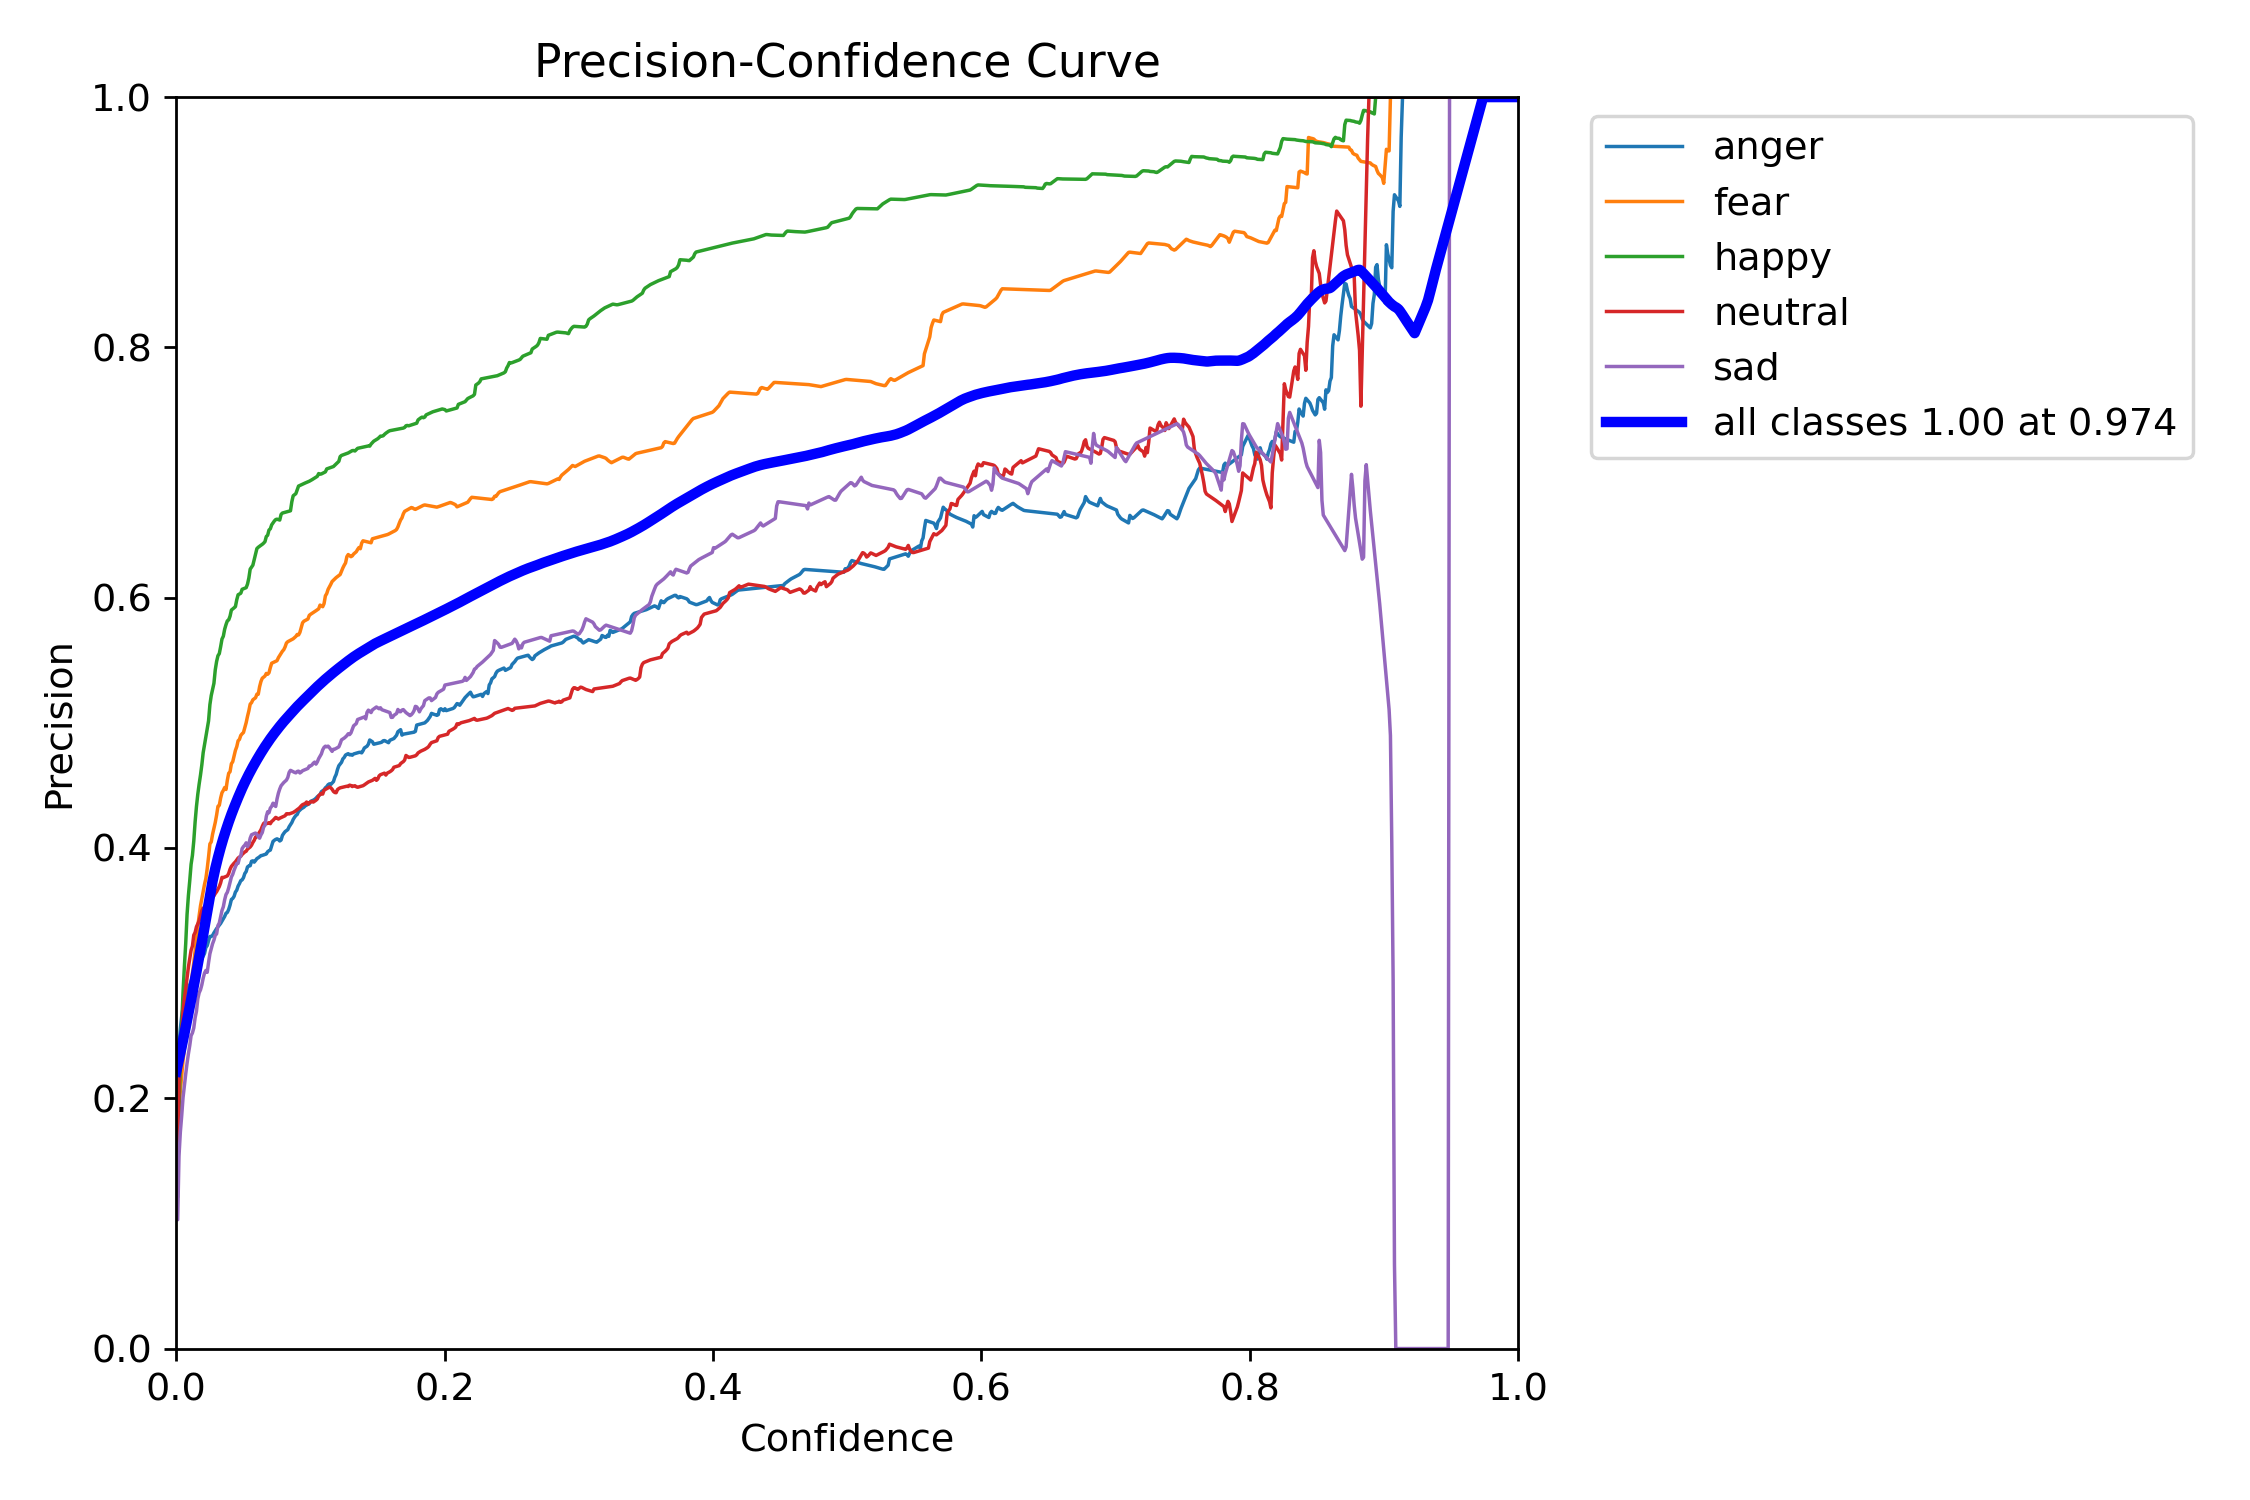

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/P_curve.png', width=600)

### **Recall Curve (R_curve.png):**

Correspondingly, this graph illustrates how the recall values change across different thresholds.

/kaggle/working


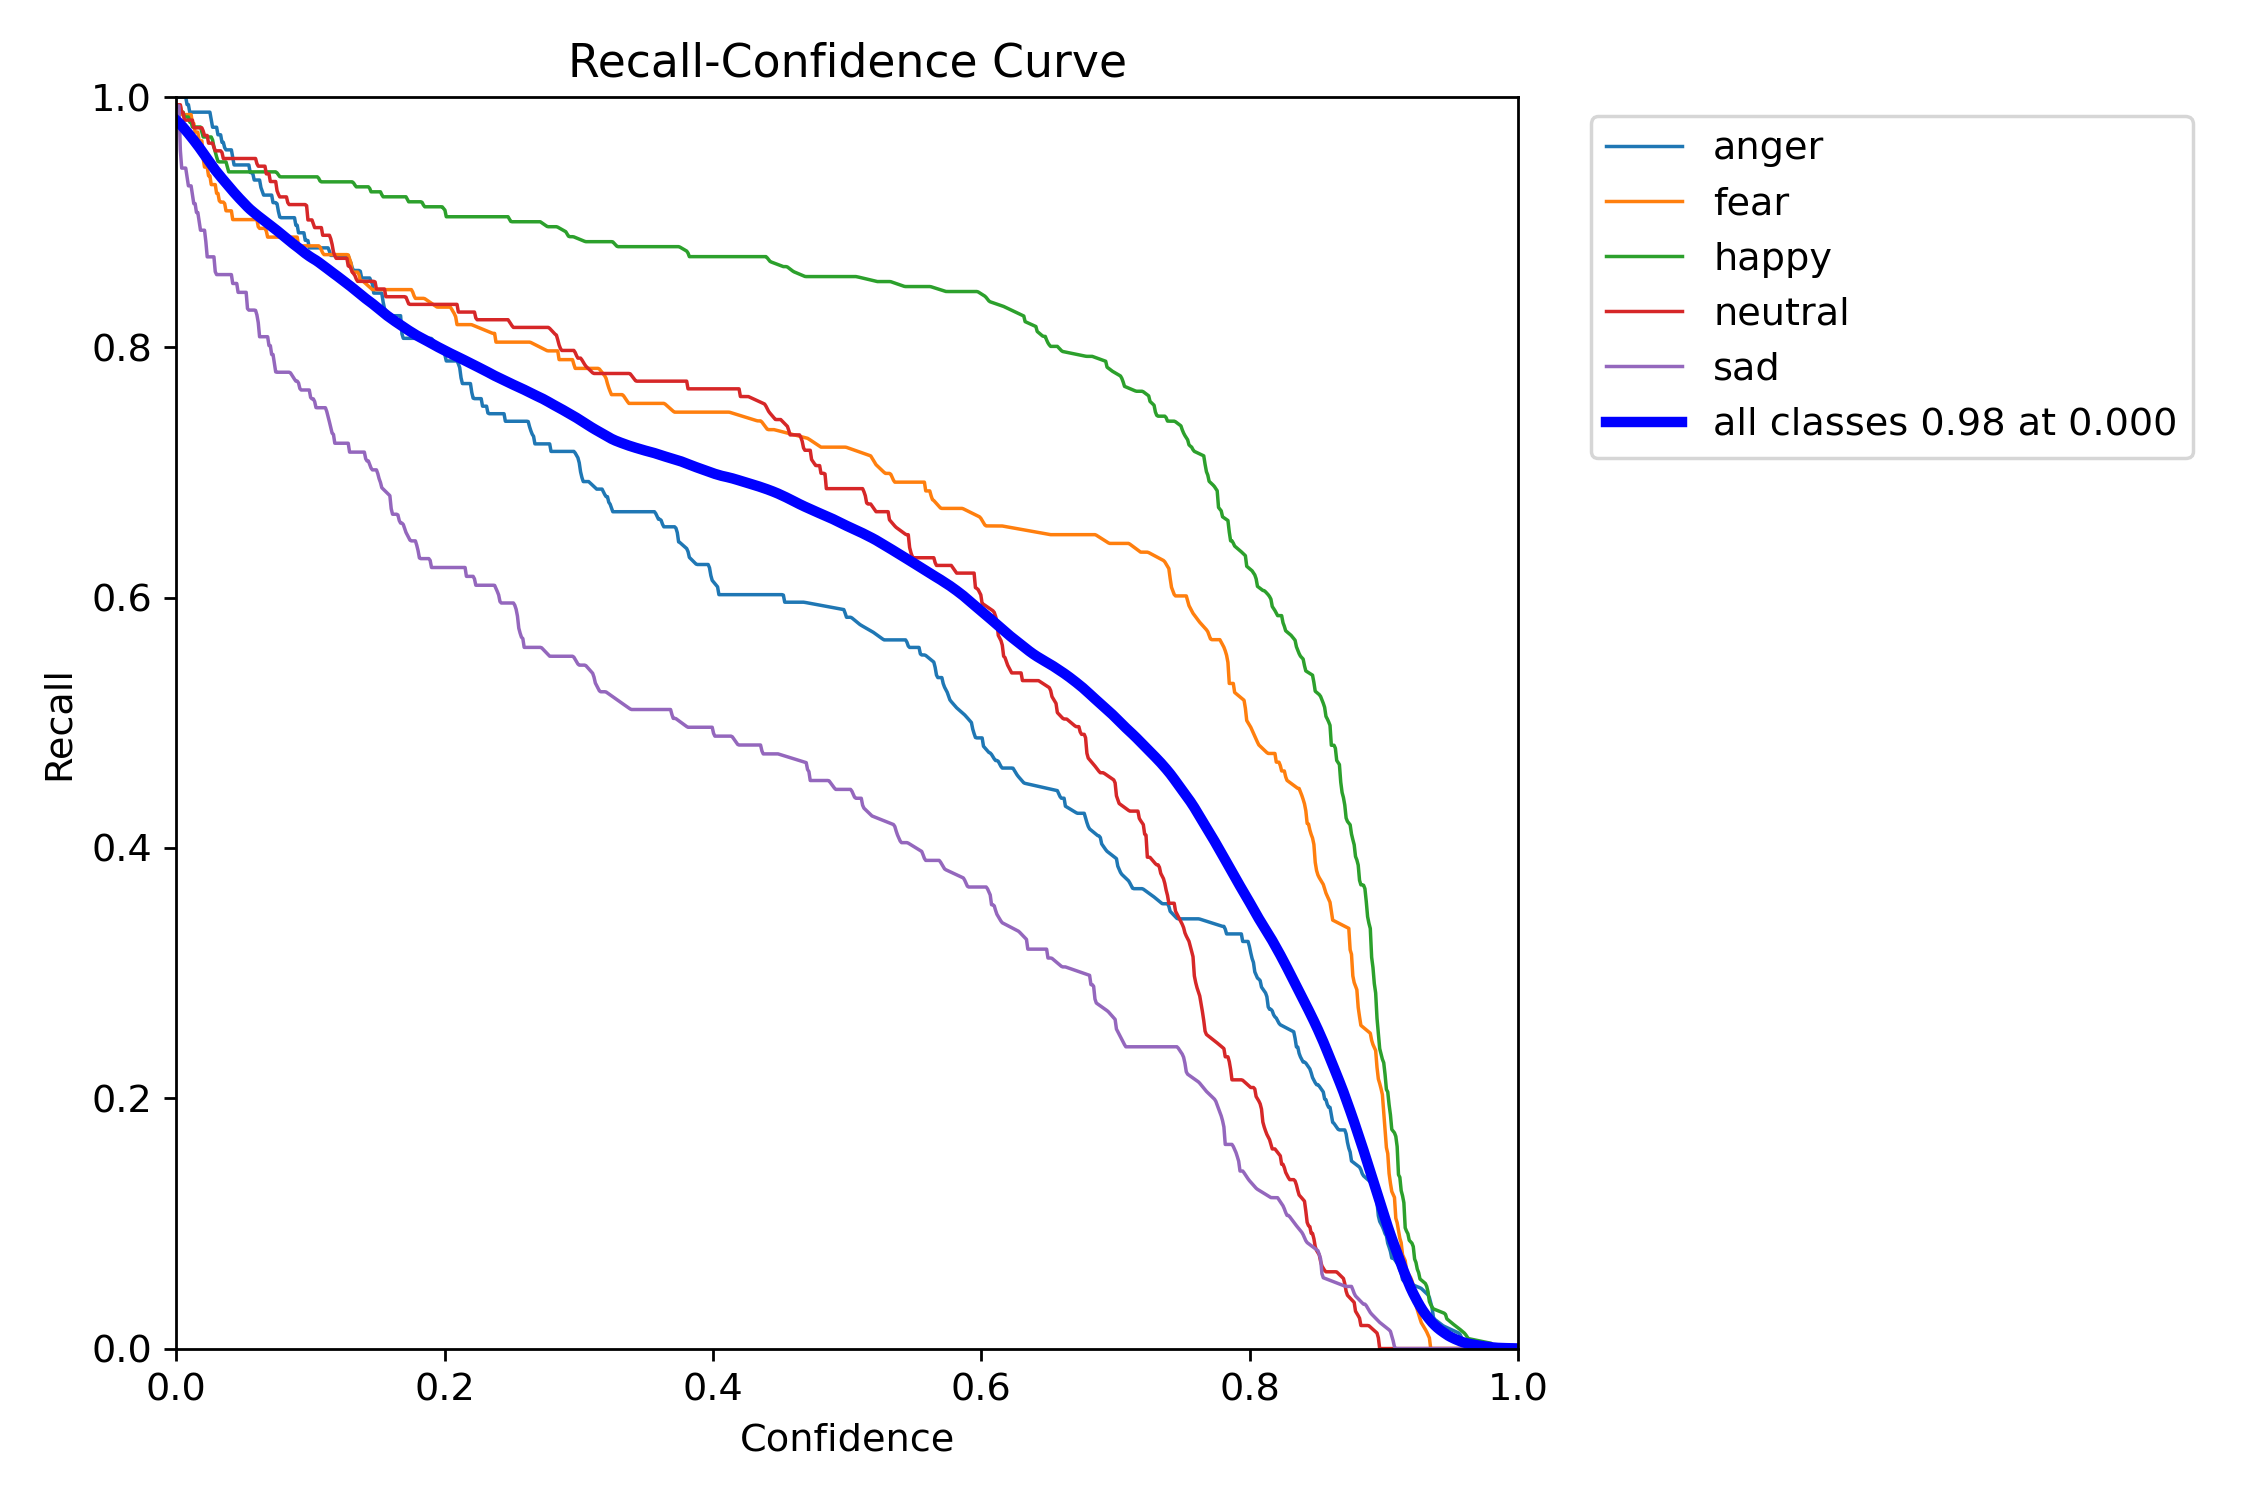

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/R_curve.png', width=600)

### **Precision-Recall Curve (PR_curve.png):**

An integral visualization for any classification problem, this curve showcases the trade-offs between precision and recall at varied thresholds. It becomes especially significant when dealing with imbalanced classes.

/kaggle/working


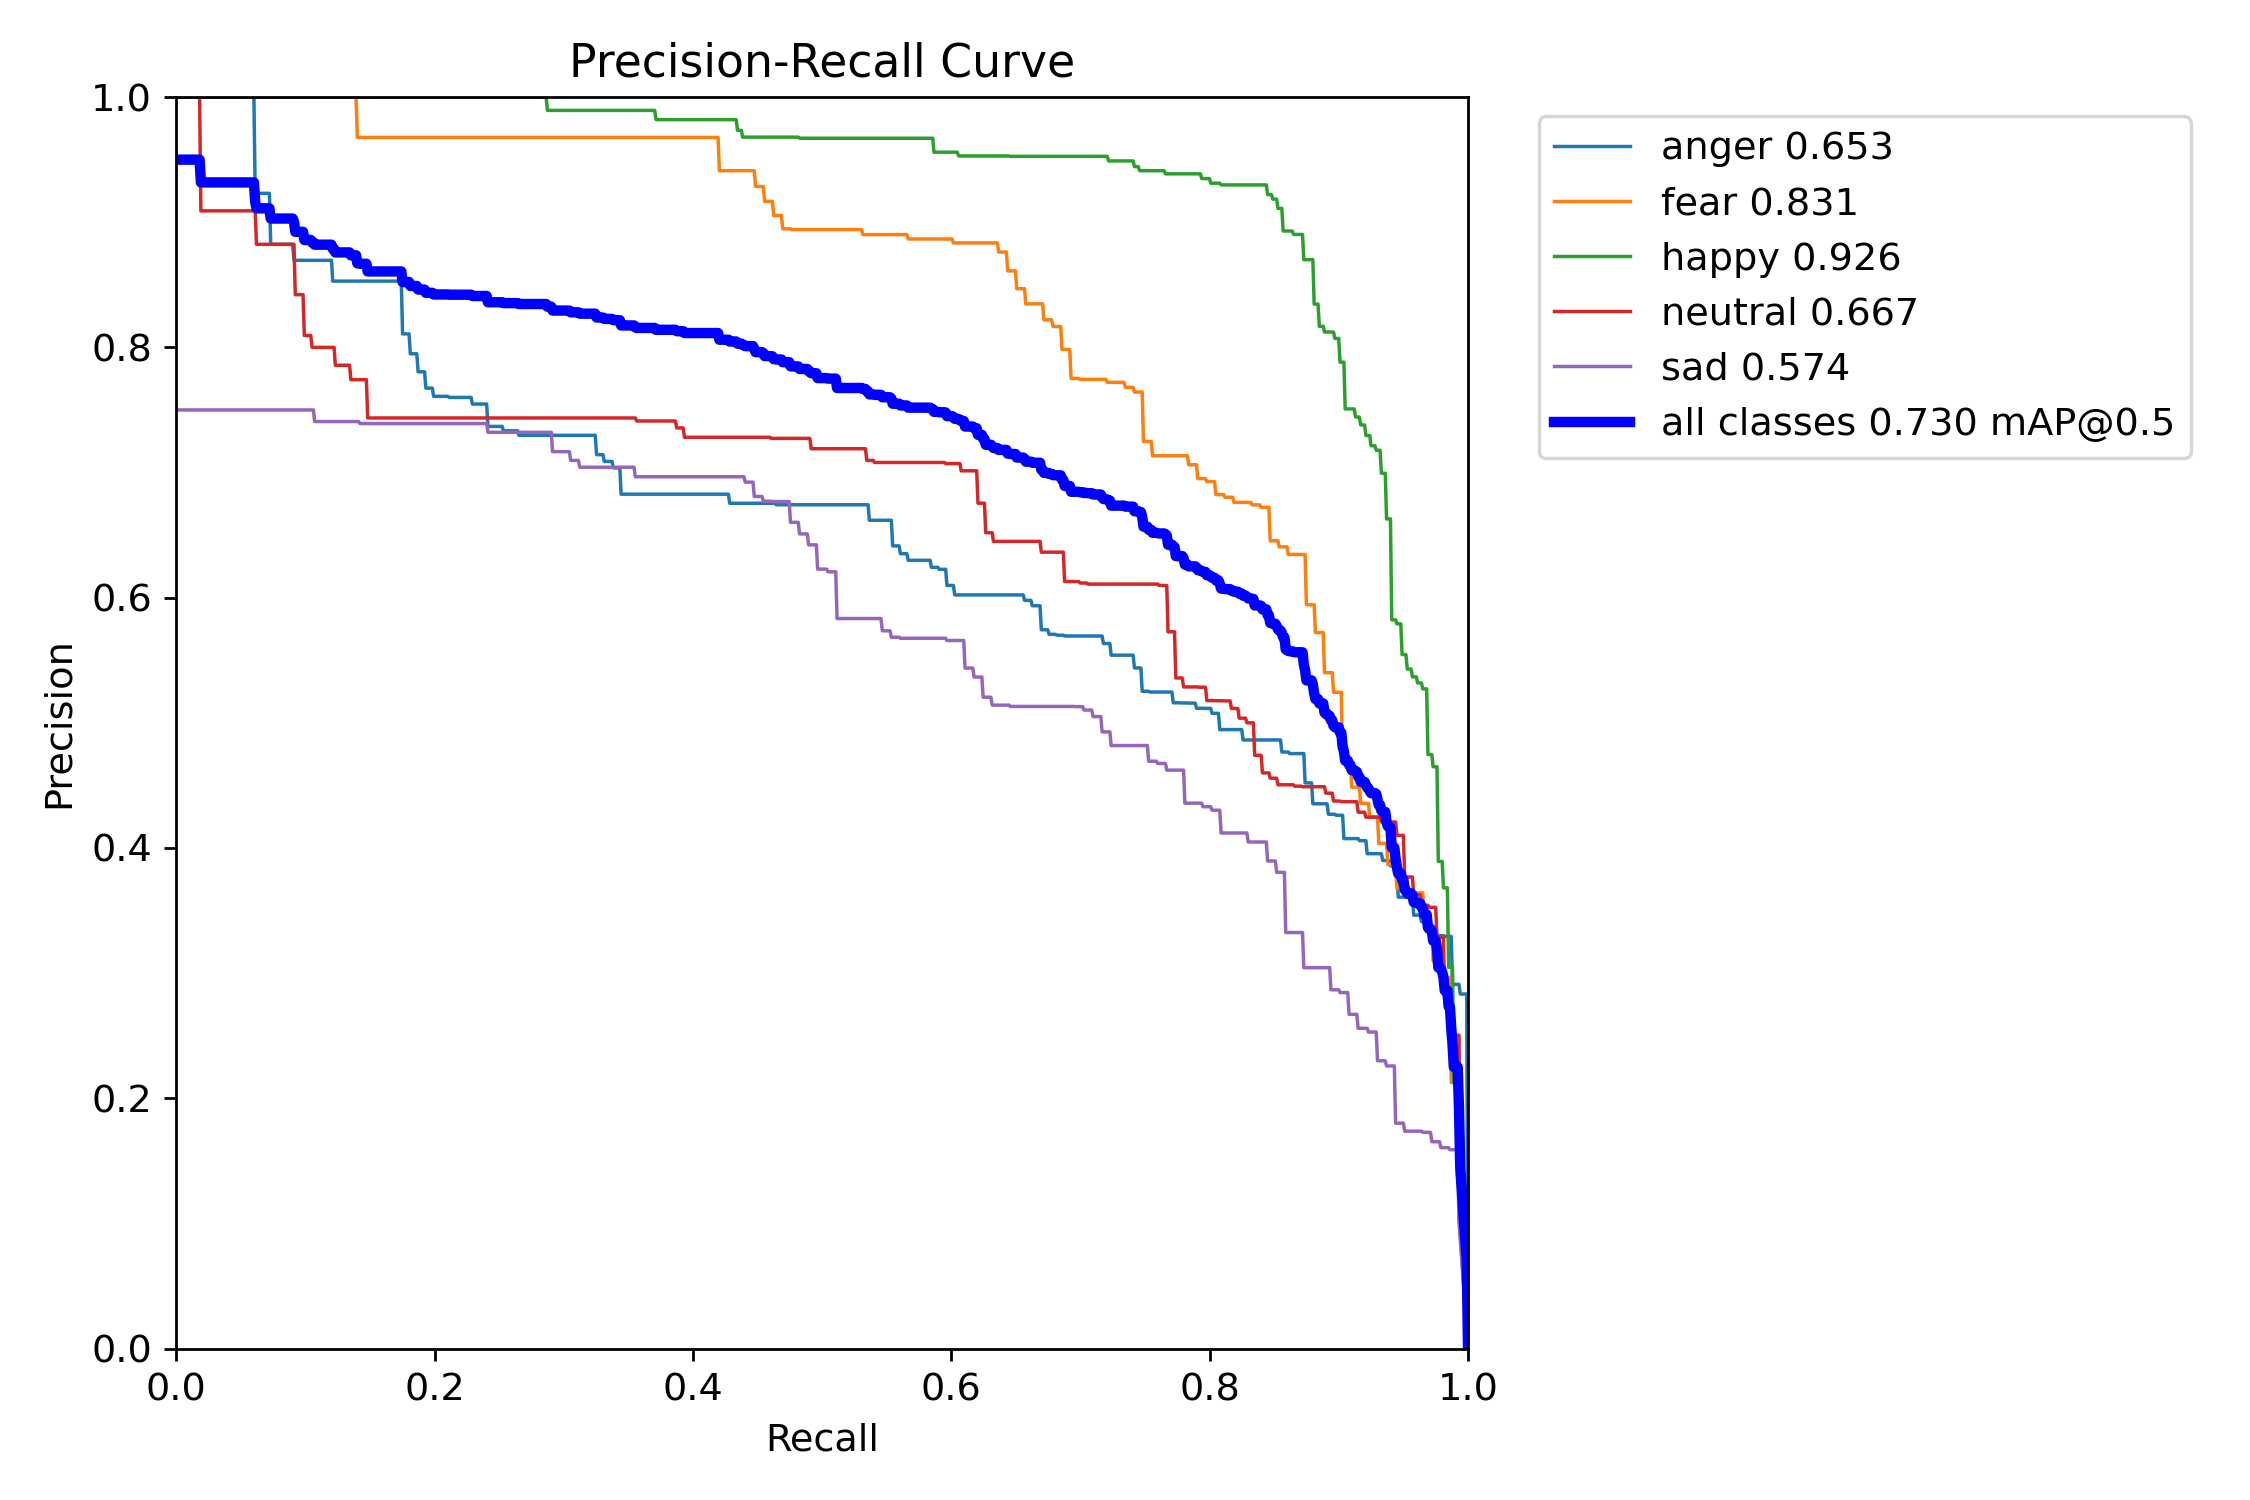

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/PR_curve.png', width=600)

### **Validation Batch Predictions (val_batchX_pred.jpg):**

Contrasting the label images, these visuals display the predictions made by the YOLOv8 model for the respective batches. By comparing these to the label images, you can easily assess how well the model detects and classifies objects visually.

/kaggle/working


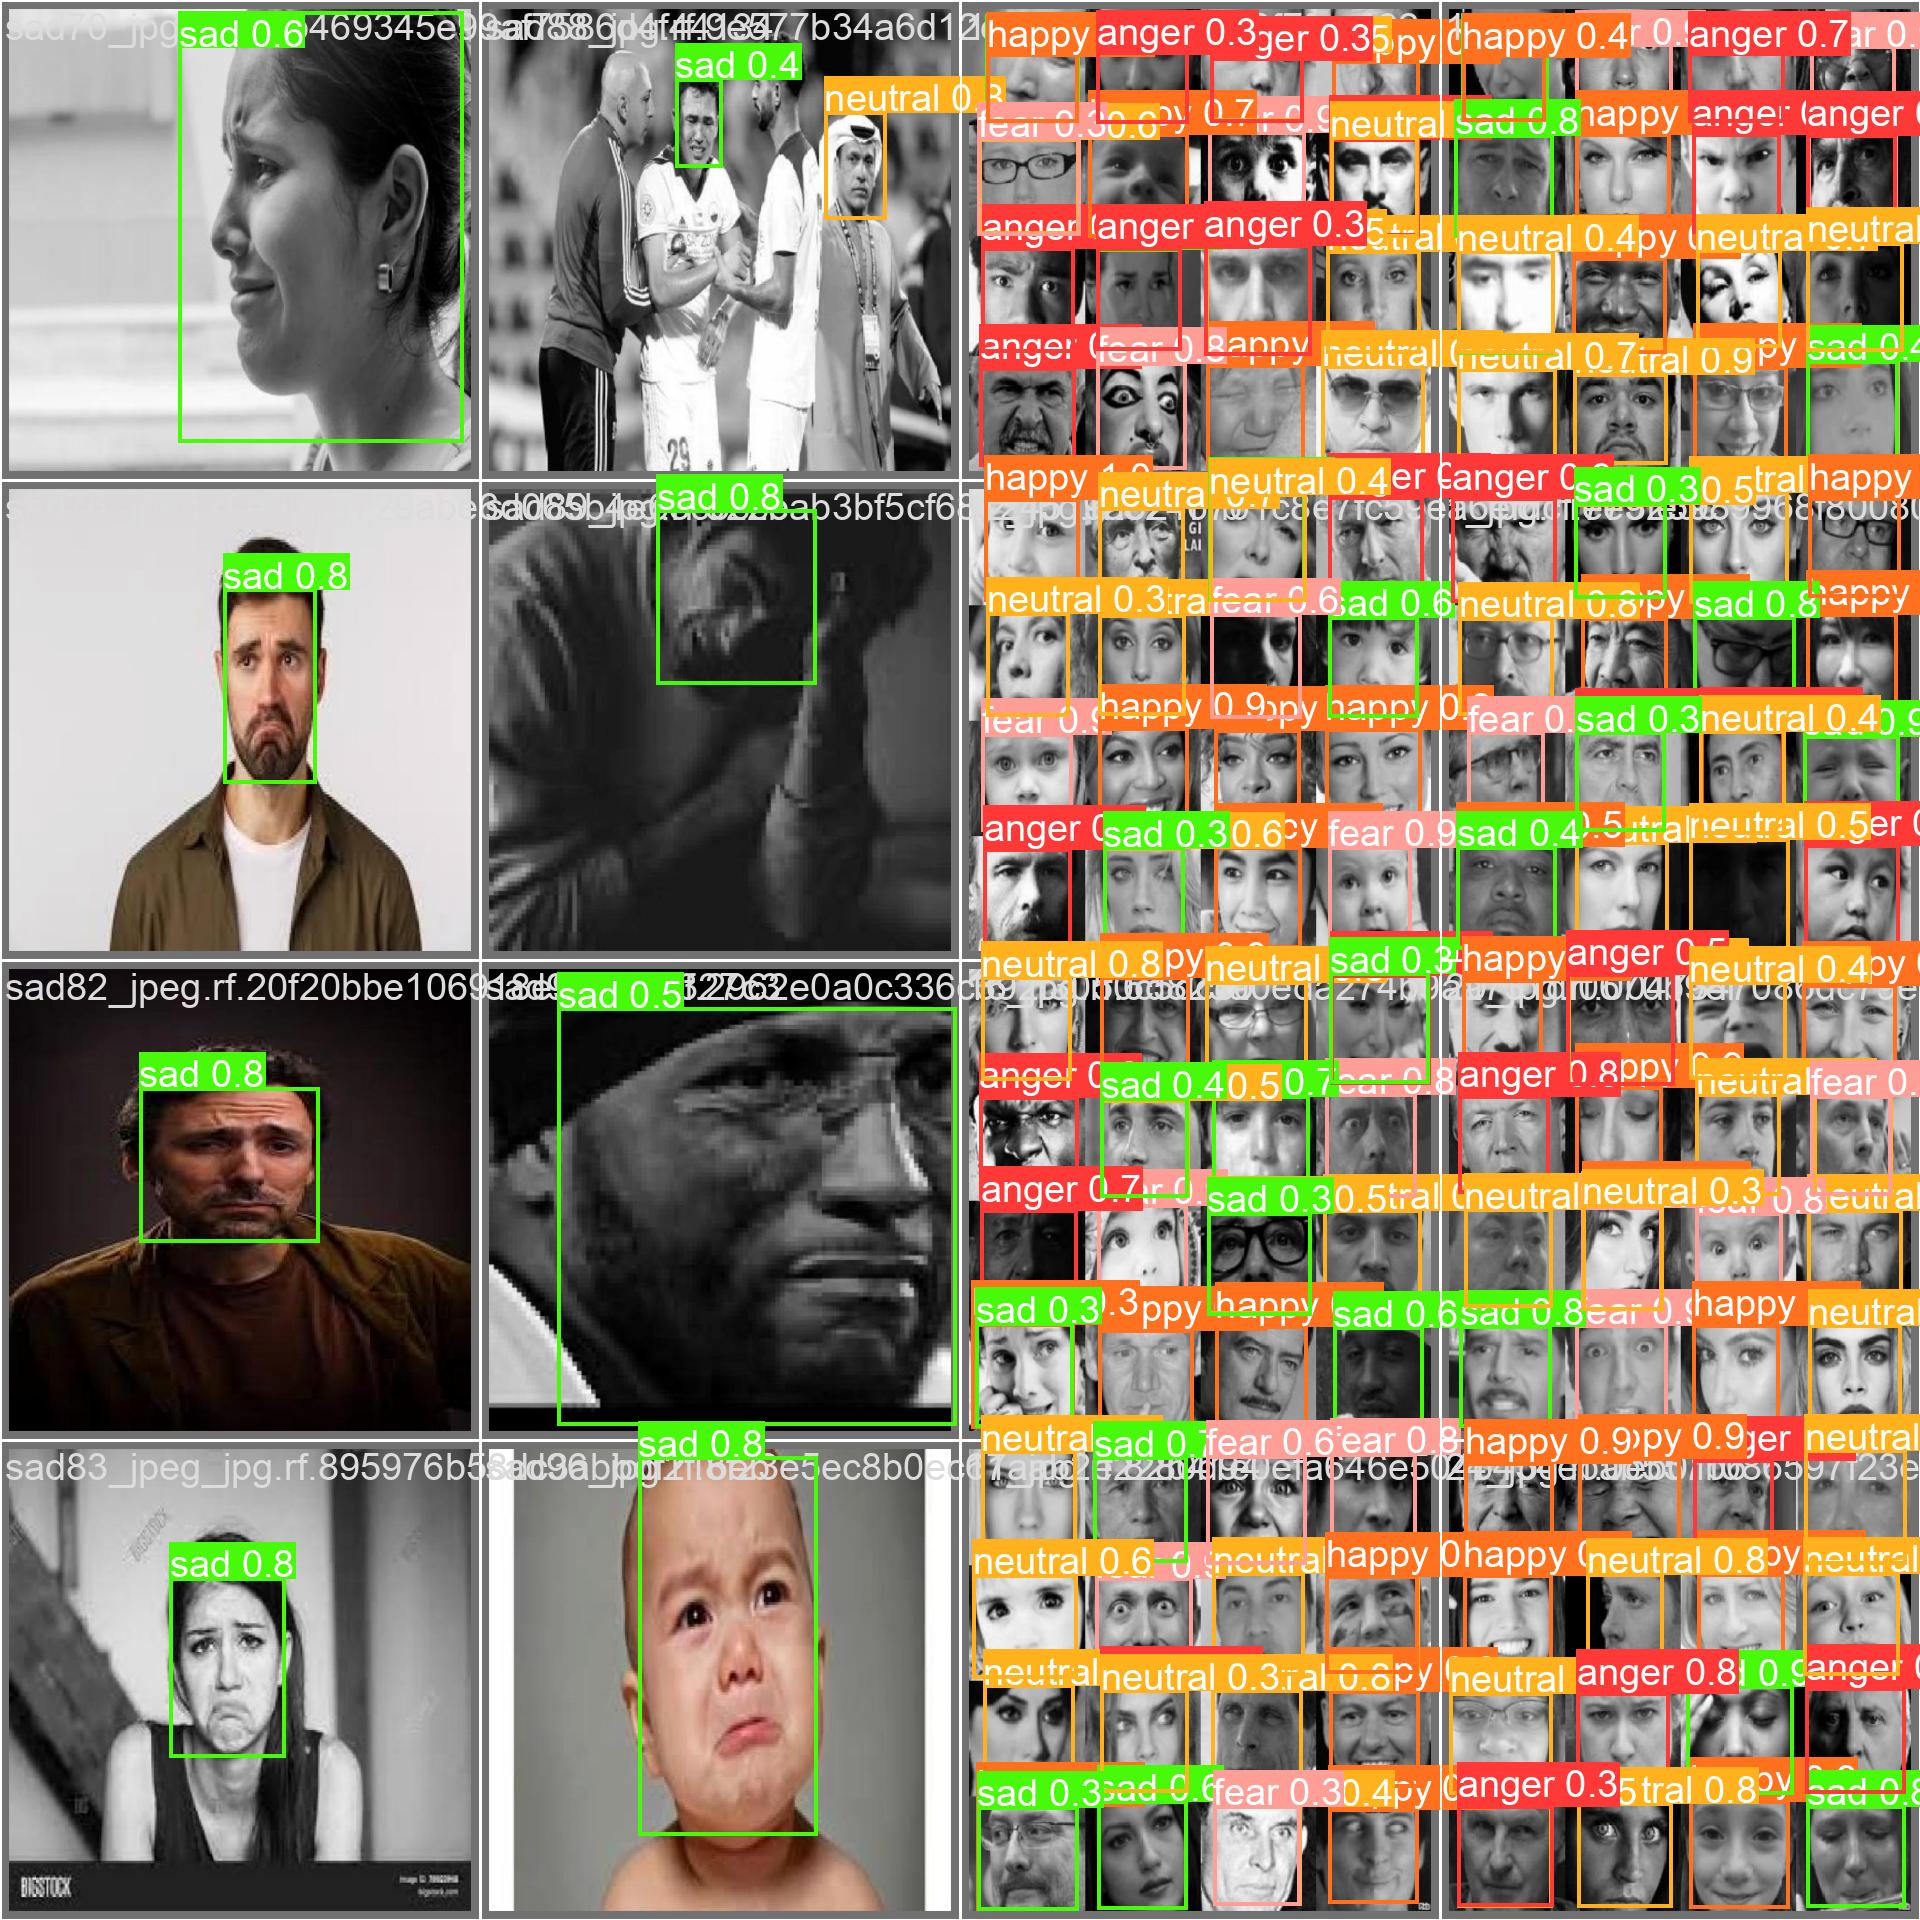

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## **Validate Custom Model**

In [ ]:
%cd {HOME}
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data='/kaggle/input/facedetection2/data.yaml'

/kaggle/working
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /kaggle/input/facedetection2/valid/labels... 200 images, 0 backgro
val: WARNING ⚠️ Cache directory /kaggle/input/facedetection2/valid is not writeable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        200        864        0.7      0.694      0.731      0.528
                 anger        200        166      0.604      0.602      0.653      0.479
                  fear        200        143      0.764      0.747      0.831      0.605
                 happy        200        251      0.884      0.873      0.926      0.665
               neutral        200        163      0.605      0.767      0.669      0.488
                   sad        200        141      0.645      0.482      0.575      0.401
Speed: 2.0ms 

## **Inference with Custom Model**

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source='/kaggle/input/facedetection2/test/images' save=True

/kaggle/working
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs

image 1/151 /kaggle/input/facedetection2/test/images/10_jpg.rf.0f63d22777350e335f848a09869f7910.jpg: 800x800 3 angers, 4 fears, 4 happys, 7 neutrals, 7.5ms
image 2/151 /kaggle/input/facedetection2/test/images/20_jpg.rf.79ac134cf90b6ad5de2166fcfefeb9c5.jpg: 800x800 4 angers, 5 happys, 8 neutrals, 1 sad, 6.7ms
image 3/151 /kaggle/input/facedetection2/test/images/38_jpg.rf.8d790cbbc2f6dfc079d27b59cb3054c7.jpg: 800x800 2 angers, 4 fears, 4 happys, 6 neutrals, 2 sads, 6.0ms
image 4/151 /kaggle/input/facedetection2/test/images/50_jpg.rf.8db3157abc00c607f8683cf53c4d532f.jpg: 800x800 5 angers, 3 fears, 3 happys, 6 neutrals, 3 sads, 5.9ms
image 5/151 /kaggle/input/facedetection2/test/images/51_jpg.rf.5d9b7418a9506578cea4f36ab293e685.jpg: 800x800 4 angers, 4 fears, 3 happys, 8 neutrals, 3 sads, 5.6ms
image 6/

**NOTE:** Let's take a look at few results.

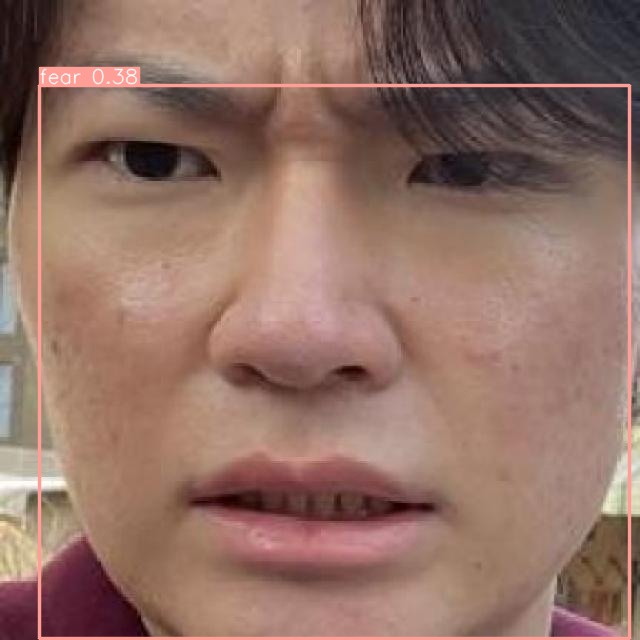

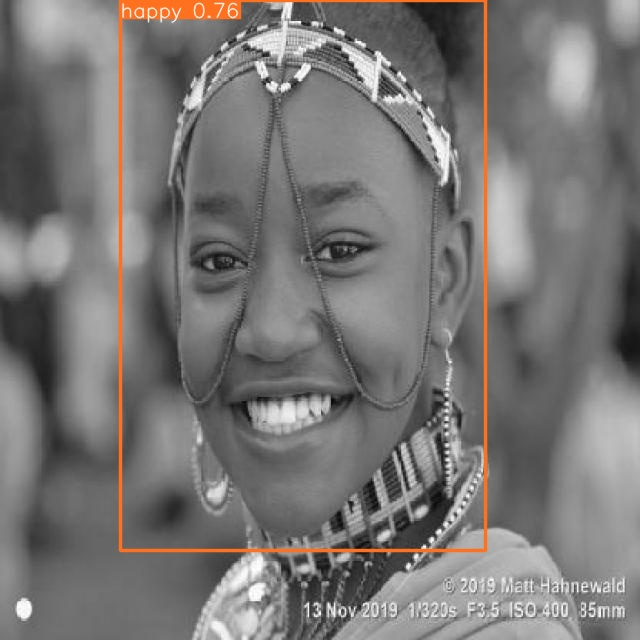

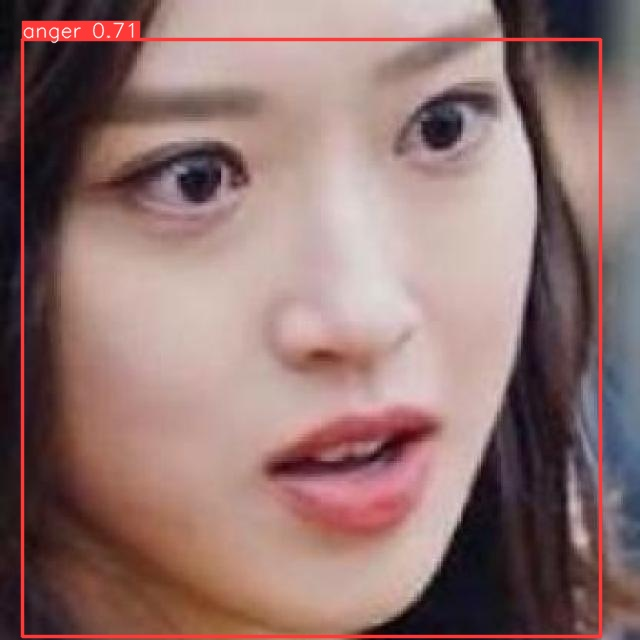

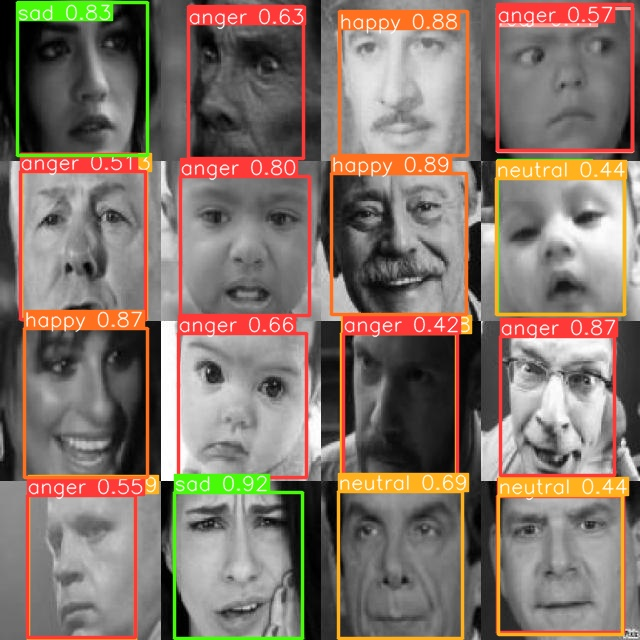

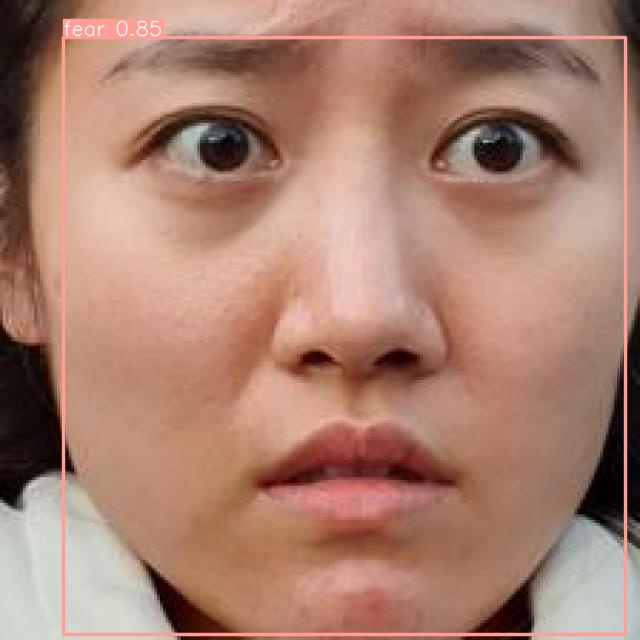

In [ ]:
for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:5]:
    display(Image(filename=image_path, width=600))
    print("\n")

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt source='/kaggle/input/videoinput/1_I7u5pNcEuUrZFtPMnSZk4g.gif'

/kaggle/working
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3006818 parameters, 0 gradients, 8.1 GFLOPs

video 1/1 (1/225) /kaggle/input/videoinput/1_I7u5pNcEuUrZFtPMnSZk4g.gif: 352x800 1 sad, 57.6ms
video 1/1 (2/225) /kaggle/input/videoinput/1_I7u5pNcEuUrZFtPMnSZk4g.gif: 352x800 1 sad, 6.5ms
video 1/1 (3/225) /kaggle/input/videoinput/1_I7u5pNcEuUrZFtPMnSZk4g.gif: 352x800 1 sad, 5.9ms
video 1/1 (4/225) /kaggle/input/videoinput/1_I7u5pNcEuUrZFtPMnSZk4g.gif: 352x800 1 sad, 5.9ms
video 1/1 (5/225) /kaggle/input/videoinput/1_I7u5pNcEuUrZFtPMnSZk4g.gif: 352x800 1 sad, 5.8ms
video 1/1 (6/225) /kaggle/input/videoinput/1_I7u5pNcEuUrZFtPMnSZk4g.gif: 352x800 1 sad, 5.9ms
video 1/1 (7/225) /kaggle/input/videoinput/1_I7u5pNcEuUrZFtPMnSZk4g.gif: 352x800 2 sads, 5.8ms
video 1/1 (8/225) /kaggle/input/videoinput/1_I7u5pNcEuUrZFtPMnSZk4g.gif: 352x800 1 sad, 5.8ms
video 1/1 (9/225) /kaggle/input/videoinput/1_I7u5pNcEuUr

In [ ]:
!ls {HOME}/runs/detect/predict3/

1_I7u5pNcEuUrZFtPMnSZk4g.avi


In [ ]:
from PIL import Image
%cd {HOME}
gif = Image.open('runs/detect/predict2/1_I7u5pNcEuUrZFtPMnSZk4g.avi')
gif.show()

/kaggle/working


UnidentifiedImageError: cannot identify image file 'runs/detect/predict2/1_I7u5pNcEuUrZFtPMnSZk4g.avi'

<p align="center"><img src="https://raw.githubusercontent.com/serengil/deepface/master/icon/deepface-icon-labeled.png" width="200" height="240"></p>

Deepface is a lightweight [face recognition](https://sefiks.com/2018/08/06/deep-face-recognition-with-keras/) and facial attribute analysis ([age](https://sefiks.com/2019/02/13/apparent-age-and-gender-prediction-in-keras/), [gender](https://sefiks.com/2019/02/13/apparent-age-and-gender-prediction-in-keras/), [emotion](https://sefiks.com/2018/01/01/facial-expression-recognition-with-keras/) and [race](https://sefiks.com/2019/11/11/race-and-ethnicity-prediction-in-keras/)) framework for python. It is a hybrid face recognition framework wrapping **state-of-the-art** models: [`VGG-Face`](https://sefiks.com/2018/08/06/deep-face-recognition-with-keras/), [`FaceNet`](https://sefiks.com/2018/09/03/face-recognition-with-facenet-in-keras/), [`OpenFace`](https://sefiks.com/2019/07/21/face-recognition-with-openface-in-keras/), [`DeepFace`](https://sefiks.com/2020/02/17/face-recognition-with-facebook-deepface-in-keras/), [`DeepID`](https://sefiks.com/2020/06/16/face-recognition-with-deepid-in-keras/), [`ArcFace`](https://sefiks.com/2020/12/14/deep-face-recognition-with-arcface-in-keras-and-python/), [`Dlib`](https://sefiks.com/2020/07/11/face-recognition-with-dlib-in-python/), `SFace` and `GhostFaceNet`.

[`Experiments`](https://github.com/serengil/deepface/tree/master/benchmarks) show that human beings have 97.53% accuracy on facial recognition tasks whereas those models already reached and passed that accuracy level.


## **Facial expression detection using Deepface module in Python**

In this model, we are going to detect the facial expression of an already existing image using OpenCV, Deepface, and matplotlib modules in python.

### **1. Modules Needed**
* **OpenCV:** OpenCV is an open-source library in python which is used for computer vision, machine learning, and image processing.
* **Matplotlib:** Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
* **Deepface:** Deepface was built by an artificial intelligence researchers group at Facebook. It is a framework in python for facial recognition and attributes analysis. Deepface’s core library components are used in Keras and TensorFlow.

In [ ]:
def most_frequent_word(input_dict):
    track={}

    for key,value in input_dict.items():
        if value not in track:
            track[value]=0
        else:
            track[value]+=1

    return max(track,key=track.get)

## **Result**
* **Read the input:** Copy the path of the picture of which expression detection is to be done, read the image using “imread()” method in cv2 providing the path within the bracket. imread() reads the image from the file and stores it in an array. Then use imshow() method of matplotlib. imshow() method converts data into image. Now plot the image using show method in order to ensure that the image has been correctly imported.

* **Output:** Create a result variable that will store the result. Use Deepface analyze() method, Deepface analyze() method contains strong facial attribute analysis features such as age, gender, facial expressions. Facial expressions include anger, fear, neutral, sad, disgust, happy, and surprise. Print the result. The result shows the facial expressions percentage of the person.

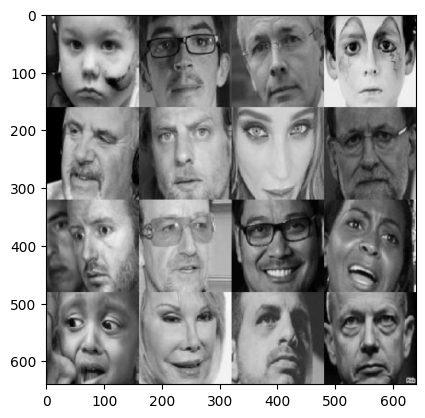

Action: race: 100%|██████████| 4/4 [00:00<00:00, 10.68it/s]  


{0: 'happy',
 1: 'happy',
 2: 'angry',
 3: 'angry',
 4: 'angry',
 5: 'angry',
 6: 'happy',
 7: 'happy',
 8: 'happy'}


Group Emotion:  happy




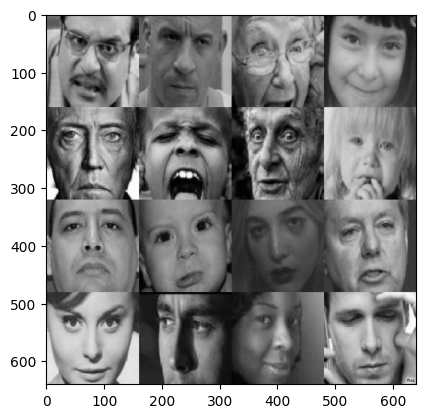

Action: race: 100%|██████████| 4/4 [00:00<00:00, 11.13it/s]  

{0: 'happy',
 1: 'angry',
 2: 'angry',
 3: 'fear',
 4: 'angry',
 5: 'fear',
 6: 'angry',
 7: 'happy',
 8: 'happy'}


Group Emotion:  angry




In [ ]:
for img_path in glob.glob('/kaggle/input/facedetection2/test/images/*.jpg')[8:10]:
    img = cv2.imread(img_path)
    plt.imshow(img[:, :,::-1])
    plt.show()
    demography = DeepFace.analyze(img_path)
    emotions = {}
    i = 0
    for demography_dict in demography:
        emotions[i] = demography_dict['dominant_emotion']
        i += 1
    pprint.PrettyPrinter(width=20).pprint(emotions)
    print("\n")
    print('\033[1m' + "Group Emotion: ", most_frequent_word(emotions) + '\033[0m')
    print("\n")

## **Conclusion:**

###